In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [2]:
main_df = pd.read_csv('dropout_students_data.csv', sep=';')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
main_df.drop(columns=['Unemployment rate','Inflation rate','Course','GDP'],inplace=True)
main_df.head(5)

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,5,1,1,122.0,1,19,12,5,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,15,1,1,1,160.0,1,1,3,3,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,5,1,1,122.0,1,37,37,9,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,17,2,1,1,122.0,1,38,37,5,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,39,1,0,1,100.0,1,37,38,9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


In [4]:
main_df.isnull().values.any()

False

In [5]:
"""Cambiamos las variables categoricas con valores numericos a variables binarias"""

attributes = ['Marital status', 'Application mode','Application order', 'Previous qualification',
             'Nacionality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation"]

hot_df = pd.get_dummies(data=main_df, columns=attributes)

In [6]:
hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Columns: 235 entries, Daytime/evening attendance	 to Father's occupation_195
dtypes: float64(4), int64(19), object(1), uint8(211)
memory usage: 1.7+ MB


In [7]:
hot_df.head(5)

,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,1,122.0,127.3,1,0,0,1,1,0,20,...,0,0,0,0,0,0,0,0,0,0
1,1,160.0,142.5,1,0,0,0,1,0,19,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,124.8,1,0,0,0,1,0,19,...,0,0,0,0,0,0,0,0,0,0
3,1,122.0,119.6,1,0,0,1,0,0,20,...,0,0,0,0,0,0,0,0,0,0
4,0,100.0,141.5,0,0,0,1,0,0,45,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#define a function to normalize
#parsea una lista de features  y el dataframe

def normalize_cols(data, feature):
    
    data_backup = data.copy()
    
    for feature_item in feature:
        max_val = data[feature_item].max()
        min_val = data[feature_item].min()
        data_backup[feature_item] = (data[feature_item] - min_val) / (max_val - min_val)
        
    return data_backup

In [9]:
#Probamos la función

feature_list = ["Previous qualification (grade)","Curricular units 1st sem (credited)",
               "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
               "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
               "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
               "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
               "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)",
               "Curricular units 2nd sem (without evaluations)","Admission grade", "Age at enrollment"]

norm_df = normalize_cols(hot_df, feature_list)

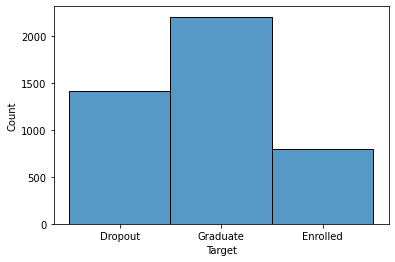

In [35]:
sns.histplot(data=norm_df, x='Target')
plt.show()

In [42]:
a,b,c = norm_df['Target'].value_counts()
c

794

In [10]:
norm_df.head(5)

,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,1,0.284211,0.340000,1,0,0,1,1,0,0.056604,...,0,0,0,0,0,0,0,0,0,0
1,1,0.684211,0.500000,1,0,0,0,1,0,0.037736,...,0,0,0,0,0,0,0,0,0,0
2,1,0.284211,0.313684,1,0,0,0,1,0,0.037736,...,0,0,0,0,0,0,0,0,0,0
3,1,0.284211,0.258947,1,0,0,1,0,0,0.056604,...,0,0,0,0,0,0,0,0,0,0
4,0,0.052632,0.489474,0,0,0,1,0,0,0.528302,...,0,0,0,0,0,0,0,0,0,0


In [11]:
class_0, class_1, class_2 = norm_df['Target'].value_counts()

df_class_0 = norm_df[norm_df['Target']=='Dropout']
df_class_1 = norm_df[norm_df['Target']=='Enrolled']
df_class_2 = norm_df[norm_df['Target']=='Graduate']

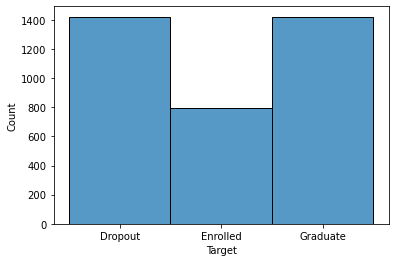

In [12]:
df_class_2_under = df_class_2.sample(class_1)
data_under_df = pd.concat([df_class_0,df_class_1,df_class_2_under],axis=0)

sns.histplot(data=data_under_df, x='Target')
plt.show()

In [13]:
X_pre = data_under_df.drop(columns=['Target'])
y_pre = data_under_df['Target']

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12)
X, y = sm.fit_resample(X_pre, y_pre)

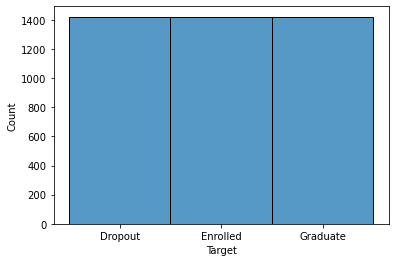

In [15]:
sns.histplot(y)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_deco = LabelEncoder()
y_deco = label_deco.fit_transform(y)

print(np.unique(y_deco,return_counts=True))

(array([0, 1, 2]), array([1421, 1421, 1421], dtype=int64))


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y_deco, test_size=0.3, random_state=12)

In [27]:
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test,y_pred))

0.40265832681782643


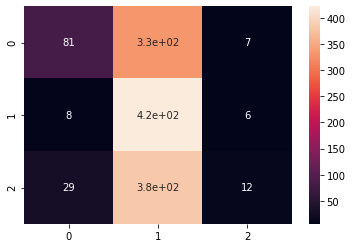

In [29]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True)
plt.show()

In [34]:
a0 = label_deco.inverse_transform(y_test)
a1 = label_deco.inverse_transform(y_pred)

print(classification_report(a0,a1))

              precision    recall  f1-score   support

     Dropout       0.69      0.19      0.30       419
    Enrolled       0.37      0.97      0.54       436
    Graduate       0.48      0.03      0.05       424

    accuracy                           0.40      1279
   macro avg       0.51      0.40      0.30      1279
weighted avg       0.51      0.40      0.30      1279



In [32]:
label_deco = LabelEncoder()
y_deco_pre = label_deco.fit_transform(y_pre)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pre, y_deco_pre, test_size=0.3, random_state=12)

gb_model = GaussianNB()
gb_model.fit(X_train_2, y_train_2)

y_pred_2 = gb_model.predict(X_test_2)

a0 = label_deco.inverse_transform(y_test_2)
a1 = label_deco.inverse_transform(y_pred_2)

print(classification_report(a0,a1))

              precision    recall  f1-score   support

     Dropout       0.76      0.17      0.28       414
    Enrolled       0.23      0.96      0.38       237
    Graduate       0.57      0.04      0.07       440

    accuracy                           0.29      1091
   macro avg       0.52      0.39      0.24      1091
weighted avg       0.57      0.29      0.22      1091

